In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

#Read the city data/ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Get the columns and the rows that are not null.
city_data_df.count(), ride_data_df.count()

(city            120
 driver_count    120
 type            120
 dtype: int64,
 city       2375
 date       2375
 fare       2375
 ride_id    2375
 dtype: int64)

In [4]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum(), ride_data_df.isnull().sum()

(city            0
 driver_count    0
 type            0
 dtype: int64,
 city       0
 date       0
 fare       0
 ride_id    0
 dtype: int64)

In [5]:
# Get the data types of each column.
city_data_df.dtypes, ride_data_df.dtypes

(city            object
 driver_count     int64
 type            object
 dtype: object,
 city        object
 date        object
 fare       float64
 ride_id      int64
 dtype: object)

In [6]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=='Urban'), sum(city_data_df["type"]=='Suburban'), sum(city_data_df["type"]=='Rural')

(66, 36, 18)

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Create the Urban city/Suburban/Rural DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head(), rural_cities_df.head()

(                 city                 date   fare        ride_id  \
 0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
 1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
 2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
 3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
 4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   
 
    driver_count   type  
 0             5  Urban  
 1            72  Urban  
 2            57  Urban  
 3            34  Urban  
 4            46  Urban  ,
                  city                 date   fare        ride_id  \
 2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
 2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
 2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
 2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
 2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   
 
       driv

In [10]:
# Get the number of rides for urban/suburban/rural cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [41]:
# Get average fare for each city in the cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [12]:
# Get the average number of drivers for each city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

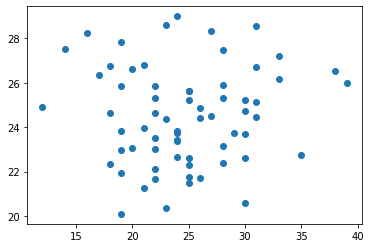

In [13]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

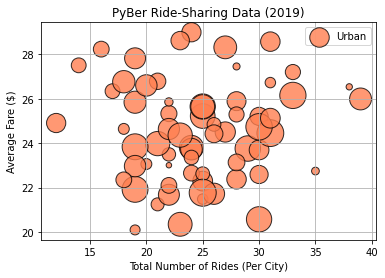

In [14]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

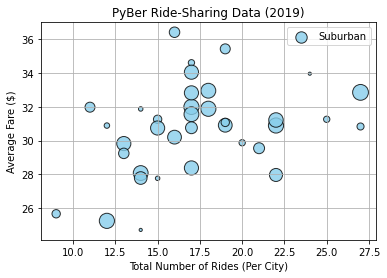

In [15]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

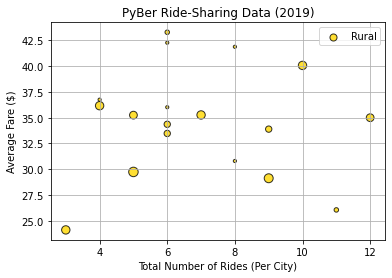

In [16]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


## 5.3.6 Bubble Chart for All Cities

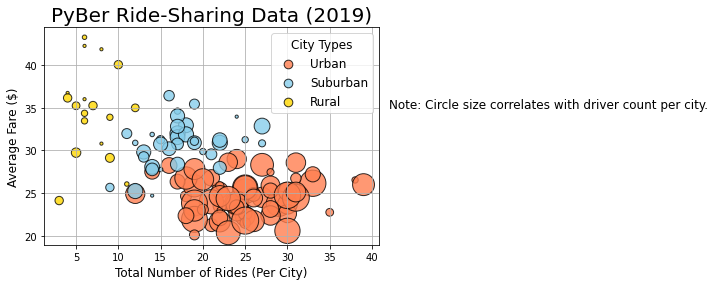

In [17]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [18]:
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


## 5.4.1 Summary Statistics for Number of Rides by City Type

In [46]:
urban_ride_count.describe()
#suburban_ride_count.describe()
#rural_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [20]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [21]:
urban_ride_count.median(), urban_ride_count.mode(), suburban_ride_count.mode()

(24.0,
 0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64)

In [22]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [23]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(mode_suburban_ride_count)

mode_rural_ride_count = sts.mode(rural_ride_count)
print(mode_rural_ride_count)

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
ModeResult(mode=array([17]), count=array([7]))
ModeResult(mode=array([6]), count=array([5]))


In [24]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

## 5.4.2-5.4.3 Summary Statistics for the fares/drivers by City Type

In [25]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(mean_suburban_fares)
mean_rural_fares = np.mean(rural_fares)
print(mean_rural_fares)
print("***********")

# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
print(urban_drivers.head())

mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)
print(f"Mean: {mean_urban_drivers, mean_suburban_drivers, mean_rural_drivers}")

mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(mode_urban_drivers, mode_suburban_drivers, mode_rural_drivers)

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
30.97012800000002
34.623440000000016
***********
0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64
Mean: (36.67815384615385, 13.712, 4.296)
ModeResult(mode=array([39]), count=array([86])) ModeResult(mode=array([20]), count=array([79])) ModeResult(mode=array([1]), count=array([32]))


## Box-and-Whisker Plots

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64


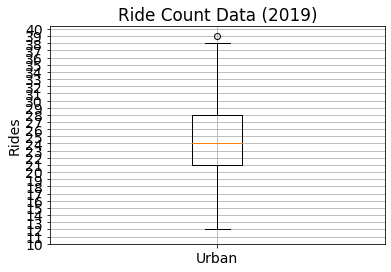

In [48]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
print(urban_ride_count.head())
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Rides")
ax.set_yticks(np.arange(10, 41), step=2.0)
ax.grid()
plt.show()



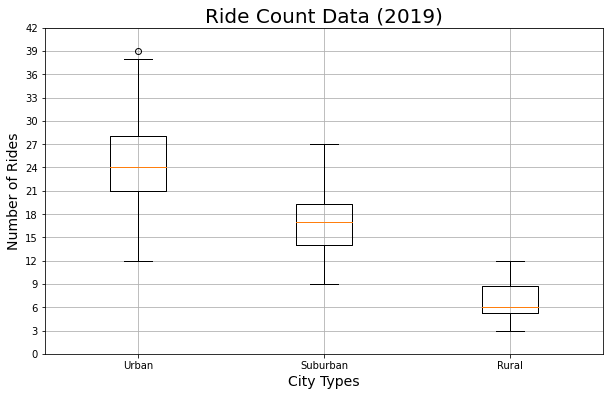

In [27]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [28]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


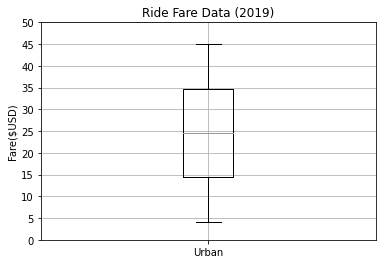

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [29]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


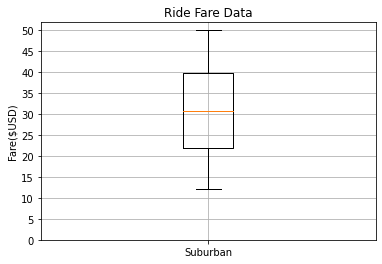

Summary Statistics
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64


In [30]:
#Create box-and-whisker plots for the suburban_fares and the rural_fares with summary statistics.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
print(suburban_fares.describe())



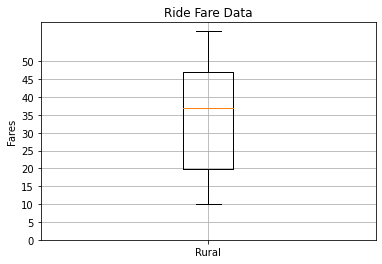

Summary Statistics for Rural Fares


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [31]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Ride Fare Data")
ax.set_ylabel("Fares")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics for Rural Fares")
rural_fares.describe()


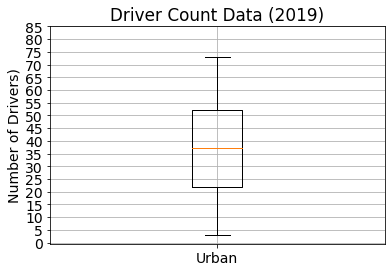

Summary Statistics_urban_driver


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

<Figure size 432x288 with 0 Axes>

In [51]:
# Create the box-and-whisker plot for the urban driver count data. (Fig.4)
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics_urban_driver")
plt.savefig("analysis/Fig4.png")
urban_drivers.describe()


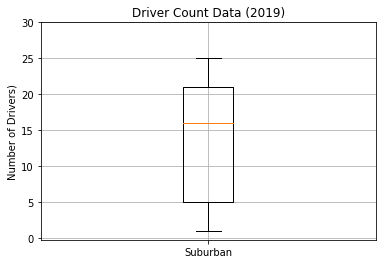

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [33]:
#box-and-whisker plots for the urban drivers, create box-and-whisker plots for 
#the suburban_drivers and the rural_drivers Series with summary statistics.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 35, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

## 5.5.1 Fare percentage for each city type

In [34]:
# Get the sum of the fares for each city type.
sum_fares_by_type =  pyber_data_df.groupby(["type"]).sum()["fare"]
print("sum_fares_by_type", sum_fares_by_type ,'***\n')

# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
print('total_fares', total_fares,'***\n')

# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
print('type_percents', type_percents,'***\n')

##Or: # Calculate the percentage of fare for each city type.
type_percents = 100* pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
print('type_percents', type_percents,'***\n')


sum_fares_by_type type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64 ***

total_fares 63538.64 ***

type_percents type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64 ***

type_percents type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64 ***



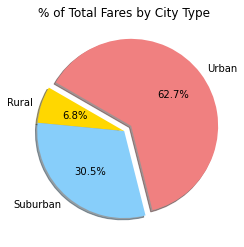

In [35]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title('% of Total Fares by City Type')
plt.show()


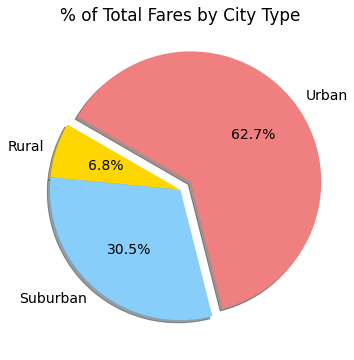

In [52]:
# import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()


## 5.6.1 Ride Percentage

In [53]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [64]:
#create two more pie charts:
# the percentage of total rides by city type and the percentage of total drivers by city type.

#total rides
sum_ride_by_type =  pyber_data_df.groupby(["type"]).count()["ride_id"]
#print("sum_rides_by_type", sum_fares_by_type ,'***\n')
# Get the sum of all the fares.
total_rides = pyber_data_df["ride_id"].count()
#print('total_rides', total_rides,'***\n')
# Calculate the percentage of fare for each city type.
type_percents_ride = 100 * sum_ride_by_type / total_rides
print('ride_percents', type_percents_ride,'***\n')


##Or: # Calculate the percentage of fare for each city type.
type_percents_ride = 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
print('ride_percents', type_percents_ride,'***\n')




ride_percents type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64 ***

ride_percents type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64 ***



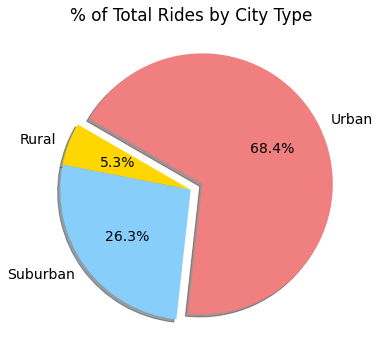

In [39]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents_ride,
       labels= ["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig6.png")
plt.show()

## Calculate Driver Percentages for each city type

In [40]:
# total drivers
type_percentage_driver = 100 * pyber_data_df.groupby(['type']).sum()['driver_count'] /pyber_data_df['driver_count'].sum()
print(pyber_data_df.groupby(['type']).sum()['driver_count'], type_percentage_driver)


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64 type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


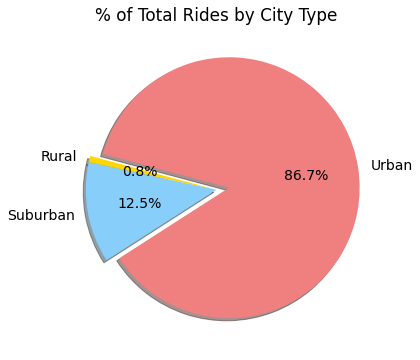

In [67]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percentage_driver,
       labels=["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle =165)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size']=14
plt.savefig('analysis/Fig7.png')
plt.show()